## FI finding

### Gilbert relations

In [2]:
import mpmath as mp
from mpmath import *
import numpy as np
from time import *

# mp.dps = 1000
mp.dps = 500
mp.prec = 166

lnMpinGev = mp.mpf('42.334')
Mp = mp.exp(lnMpinGev)
# Mp = mp.mpf('2.4e18')

phigut=mp.mpf('3e16')

g1gut = mp.sqrt(mp.mpf('5')/mp.mpf('3'))*mp.mpf('5.45185741e-01')
g2gut = mp.mpf('6.90473022e-01')
g3gut = mp.mpf('6.84972506e-01')
m1gut = mp.mpf('1.36108022e+02')
m2gut = mp.mpf('1.14286222e+03')
m3gut = mp.mpf('8.98639714e+02')
A6gut = mp.mpf('300000')
phi0 = mp.mpf('3e16')
dv = mp.mpf('0')

pre = mp.mpf('1')/(mp.mpf('8')*mp.pi**2)


b1, b2, b3 = mp.mpf('33')/mp.mpf('5'), mp.mpf('1'), mp.mpf('-3')
# b1, b2, b3 = 0, 0, 0

g1 = lambda phi : g1gut/(mp.sqrt(1-pre*b1*g1gut**2*mp.log(phi/phigut)))
g2 = lambda phi : g2gut/(mp.sqrt(1-pre*b2*g2gut**2*mp.log(phi/phigut)))
g3 = lambda phi : g3gut/(mp.sqrt(1-pre*b3*g3gut**2*mp.log(phi/phigut)))

M1 = lambda phi : m1gut*(g1(phi)/g1gut)**mp.mpf('2')
M2 = lambda phi : m2gut*(g2(phi)/g2gut)**mp.mpf('2')
M3 = lambda phi : m3gut*(g3(phi)/g3gut)**mp.mpf('2')

mphi = lambda phi, mphigut : mp.sqrt(mphigut**2+(m2gut**2-M2(phi)**2)+mp.mpf('1')/11*(m1gut**2-M1(phi)**2))
A6 = lambda phi, A6gut : A6gut-mp.mpf('6')*(m2gut-M2(phi))-mp.mpf('6')/11*(m1gut-M1(phi))
lambda6 = lambda phi, lambda6gut : lambda6gut*(g2gut/g2(phi))**mp.mpf('6')*(g1gut/g1(phi))**(mp.mpf('6')/11)

mphi_run = lambda phi_start, phi_end, mphi_start : mp.sqrt(mphi_start**2+(M2(phi_start)**2-M2(phi_end)**2)+mp.mpf('1')/11*(M1(phi_start)**2-M1(phi_end)**2))
lambda6_run = lambda phi_start, phi_end, lambda6_start : lambda6_start*(g2(phi_start)/g2(phi_end))**mp.mpf('6')*(g1(phi_start)/g1(phi_end))**(mp.mpf('6')/11)

# ai = mphi_run(3e16, 1e15, 3000)
# print(ai)
# print(mphi_run(1e15, 3e16, ai))
B1=b1/(16*mp.pi**2)
B2=b2/(16*mp.pi**2)
C1=2*B1
C2=2*B2
e1=mp.mpf('1')/mp.mpf('11')*b1/(4*mp.pi**2) 
# e1=3/(20*mp.pi**2)
e2=b2/(mp.mpf('4')*mp.pi**2)
# e2=1/(4*mp.pi**2)
F1=3*e1
F2=3*e2
D1=F1/2
D2=F2/2
# print(B1,B2,C1,C2,e1,e2,F1,F2,D1,D2)
def betag1(phi):
#     return mp.mpf('0')
    return 2*B1*g1(phi)**4 #OK
def betag2(phi):
    return 2*B2*g2(phi)**4 #OK
def betaM1(phi):
    return C1*g1(phi)**2*M1(phi) #OK
def betaM2(phi):
    return C2*g2(phi)**2*M2(phi) #OK
def betam(phi):
    return -e1*g1(phi)**2*M1(phi)**2-e2*g2(phi)**2*M2(phi)**2 #OK
def betaA(phi):
    return F1*g1(phi)**2*M1(phi)+F2*g2(phi)**2*M2(phi) #OK
def betalambda(phi):
    return -(D1*g1(phi)**2+D2*g2(phi)**2) #OK
def CST1p(phi, dv):
    return 2*dv/phi-betam(phi) #OK
def CST2p(phi):
    return -2*((B1+C1)*e1*M1(phi)**2*g1(phi)**4+(B2+C2)*e2*M2(phi)**2*g2(phi)**4)+3*betam(phi) #OK
def c1(phi):
    return -12*(5+betalambda(phi)) #OK
def c2(phi):
    return -12*(D1*betag1(phi)+D2*betag2(phi)-(5+betalambda(phi))*(9+2*betalambda(phi))) #OK
def c3(phi, A6gut):
    return betaA(phi)+A6(phi, A6gut)*(6+betalambda(phi)) #OK
#     return betaA(phi)+(6+betalambda(phi))
def c4(phi, A6gut):
    return -(2*B1+C1)*F1*M1(phi)*g1(phi)**4-(2*B2+C2)*F2*M2(phi)*g2(phi)**4-betaA(phi)*(mp.mpf('11')+2*betalambda(phi))+A6(phi, A6gut)*(D1*betag1(phi)+D2*betag2(phi)-(5+betalambda(phi))*(6+betalambda(phi))) #OK
#     return (2*B1+C1)*F1*M1(phi)*g1(phi)**4+(2*B2+C2)*F2*M2(phi)*g2(phi)**4-betaA(phi)*(mp.mpf('11')+2*betalambda(phi))+(D1*betag1(phi)+D2*betag2(phi)-(5+betalambda(phi))*(6+betalambda(phi)))
def COEF1(phi, A6gut, dv):
    return 3*(CST2p(phi)*c1(phi) - CST1p(phi, dv)*c2(phi))**2 + (CST2p(phi)*c3(phi, A6gut) - CST1p(phi, dv)*c4(phi, A6gut))*(c2(phi)*c3(phi, A6gut) - c1(phi)*c4(phi, A6gut)) #OK
def COEF2(phi, A6gut, dv):
    return 2*(6*(c1(phi) + c2(phi))*(CST2p(phi)*c1(phi) - CST1p(phi, dv)*c2(phi)) + (c3(phi, A6gut) + c4(phi, A6gut))*(c2(phi)*c3(phi, A6gut) - c1(phi)*c4(phi, A6gut)))
def COEF3(phi):
    return 12*(c1(phi) + c2(phi))**2 #OK
def mphi_FI(phi, A6gut, dv):
    Gilbert_res = mp.sqrt((-COEF2(phi, A6gut, dv) + mp.sqrt(COEF2(phi, A6gut, dv)**2-4*COEF1(phi, A6gut, dv)*COEF3(phi)))/(2*COEF3(phi)))
    return Gilbert_res
def lambda6_FI(phi, A6gut, dv):
    return 3*Mp**3/phi**4*(CST2p(phi)*c1(phi) - CST1p(phi, dv)*c2(phi) + 2*mphi_FI(phi, A6gut, dv)**2*(c1(phi) + c2(phi)))/(c2(phi)*c3(phi, A6gut) - c1(phi)*c4(phi, A6gut))

# print(end='alpha_tree = ')
# nprint(A6gut**2/(40*mphi_run(phi0, phigut, mphi_FI(phi0))**2),10)
# print(end='phi0_tree = ')
# nprint((A6gut*Mp**3/(20*lambda6_run(phi0, phigut, lambda6_FI(phi0))))**0.25,10)


def V(phi, phi0, A6gut, dv):
    mphi_FI_phi0, lambda6_FI_phi0 = mphi_FI(phi0, A6gut, dv), lambda6_FI(phi0, A6gut, dv)
    mphi_FI_gut, lambda6_FI_gut = mphi_run(phi0, phigut, mphi_FI_phi0), lambda6_run(phi0, phigut, lambda6_FI_phi0)
    return 1/2*mphi(phi, mphi_FI_gut)**2*phi**2-A6(phi, A6gut)*lambda6(phi, lambda6_FI_gut)*phi**6/(6*Mp**3)+lambda6(phi, lambda6_FI_gut)**2/Mp**6*phi**10

def DV(V,phi):
    return mp.diff(V, phi)
def D2V(V, phi):
    return mp.diff(V, phi, 2)
def eps1_(V, phi):
    return mp.fdiv(mp.power((mp.fmul((mp.mpf(1)*Mp),mp.fdiv(DV(V, phi),V(phi)))),2),2)



### one point example (changer valeur en haut du code au dessus)

input GUT:
A6 = 300000.0
g1 = 0.7038317652
g2 = 0.690473022
g3 = 0.684972506
M1 = 136.108022
M2 = 1142.86222
M3 = 898.639714 

phi0 = 3.0e+16 

result:
mphi_FI(phi0) = 47342.3607126125545917945155769
lambda6_FI(phi0) = 0.000000265659454167088655400975944051
V'(phi0) = -6.9388939039072283776e-18
V''(phi0) = -1.6940658945086006781e-21
eps1(phi0) = 4.9474745168884831385e-82


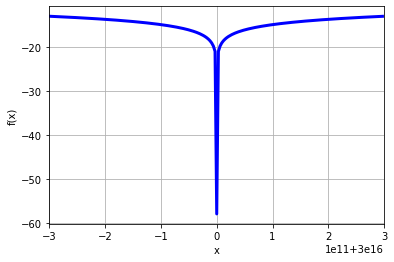

3.1480150736228396619e+23
mphi_FI = 47453.0483444441901391771127687
lambda6_FI = 0.000000265502744925287660324516688946


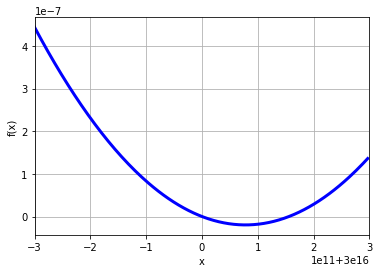

V'(phi0) = 3.1480150736228396619e+23
V''(phi0) = 0.0
-0.0046815167388876917586
0.0011794274129323502604


In [9]:
mphi_FI_phi0, lambda6_FI_phi0 = mphi_FI(phi0, A6gut, dv), lambda6_FI(phi0, A6gut, dv)
mphi_FI_gut, lambda6_FI_gut = mphi_run(phi0, phigut, mphi_FI_phi0), lambda6_run(phi0, phigut, lambda6_FI_phi0)

print('input GUT:')
print('A6 =', nstr(A6gut,10))
print('g1 =',nstr(g1gut,10))
print('g2 =',nstr(g2gut,10))
print('g3 =',nstr(g3gut,10))
print('M1 =',nstr(m1gut,10))
print('M2 =',nstr(m2gut,10))
print('M3 =',nstr(m3gut,10),'\n')
print('phi0 =',nstr(phi0, 10),'\n')


print('result:')
print('mphi_FI(phi0) =',nstr(mphi_FI(phi0, A6gut, dv),30))
print('lambda6_FI(phi0) =',nstr(lambda6_FI(phi0, A6gut, dv),30))
print('V\'(phi0) =',nstr(DV(lambda phi : V(phi, phi0, A6gut, dv), phi0),20))
print('V\'\'(phi0) =',nstr(D2V(lambda phi : V(phi, phi0, A6gut, dv), phi0),20))
print('eps1(phi0) =',nstr(eps1_(lambda phi : V(phi, phi0, A6gut, dv), phi0),20))
# mphi_FI_phi0, lambda6_FI_phi0 = mphi_FI(phi0, A6gut, dv), lambda6_FI(phi0, A6gut, dv)
# mphi_FI_gut, lambda6_FI_gut = mphi_run(phi0, phigut, mphi_FI_phi0), lambda6_run(phi0, phigut, lambda6_FI_phi0)
# print('mphi_FI =',nstr(mphi_FI_gut,30))
# print('lambda6_FI =',nstr(lambda6_FI_gut,30))
mp.plot(lambda phi : mp.log10(eps1_(lambda phi : V(phi, phi0, A6gut, dv), phi)), xlim=(phi0*0.99999, phi0*1.00001), points=200)

# print('\n POUR TESTER TREE, "b1, b2, b3 = 0, 0, 0" LINE 25')

V_find = lambda phi, dv : V(phi, phi0, A6gut, dv)
dv_1 = mp.findroot(lambda dv : eps1_(lambda phi : V_find(phi, dv), phi0)-1, method='ridder',x0 = (1e20, 1e21))
print(nstr(dv_1, 20))
mphi_FI_phi0_1, lambda6_FI_phi0_1 = mphi_FI(phi0, A6gut, dv_1), lambda6_FI(phi0, A6gut, dv_1)
mphi_FI_gut_1, lambda6_FI_gut_1 = mphi_run(phi0, phigut, mphi_FI_phi0_1), lambda6_run(phi0, phigut, lambda6_FI_phi0_1)

print('mphi_FI =',nstr(mphi_FI_gut_1,30))
print('lambda6_FI =',nstr(lambda6_FI_gut_1,30))
mp.plot(lambda phi : mp.log10(eps1_(lambda phi : V(phi, phi0, A6gut, dv_1), phi)), xlim=(phi0*0.99999, phi0*1.00001), points=200)
print('V\'(phi0) =',nstr(DV(lambda phi : V(phi, phi0, A6gut, dv_1), phi0),20))
print('V\'\'(phi0) =',nstr(D2V(lambda phi : V(phi, phi0, A6gut, dv_1), phi0),20))

nprint(mp.mpf('1')-mphi_FI_gut_1**2/mphi_FI_gut**2,20)
nprint(mp.mpf('1')-lambda6_FI_gut_1**2/lambda6_FI_gut**2,20)

## As ns numerical calculations


In [3]:
def norm_potential(x,alpha,phi0):
    return x**mp.mpf('2')-mp.mpf('2')/3*alpha*x**6+alpha/mp.mpf('5')*x**10

def norm_eps1(x,alpha,phi0):
    return mp.mpf('450')*(mp.mpf('1')+alpha*x**4*(-mp.mpf('2')+x**4))**2/((phi0*x)**mp.mpf('2')*(mp.mpf('15')+alpha*x**4*(-mp.mpf('10')+mp.mpf('3')*x**4))**2)

def norm_eps2(x,alpha,phi0):
    return (mp.mpf('60')*(mp.mpf('15')+alpha*x**mp.mpf('4')*(mp.mpf('40')+x**mp.mpf('4')*(-mp.mpf('78')+alpha*(mp.mpf('20')+mp.mpf('3')*x**8)))))/(phi0**2*x**2*(mp.mpf('15')+alpha*x**mp.mpf('4')*(-mp.mpf('10')+mp.mpf('3')*x**4))**2)
       
def norm_eps3(x,alpha,phi0):
    return (mp.mpf('60')*(mp.mpf('1')+alpha*x**4*(-mp.mpf('2')+x**mp.mpf('4')))*(mp.mpf('225')+alpha*x**mp.mpf('4')*(-mp.mpf('1350')+x**4*(mp.mpf('3915')+alpha*(-mp.mpf('2100')+mp.mpf('20')*(mp.mpf('81')-mp.mpf('10')*alpha)*x**4+mp.mpf('15')*(-mp.mpf('99')+mp.mpf('20')*alpha)*x**mp.mpf('8')+mp.mpf('90')*alpha*x**mp.mpf('12')+mp.mpf('9')*alpha*x**16)))))/(x**2*(mp.mpf('15')+alpha*x**mp.mpf('4')*(-mp.mpf('10')+mp.mpf('3')*x**4))**2*(mp.mpf('15')+alpha*x**4*(mp.mpf('40')+x**4*(-mp.mpf('78')+alpha*(mp.mpf('20')+mp.mpf('3')*x**8)))))/phi0**2

def x_endinf(alpha,phi0):
    xstart = mp.mpf('0.9841521')
    return mp.findroot(lambda x : norm_eps1(x,alpha,phi0)-mp.mpf('1'), xstart,solver='halley', verbose = False)

def efold_primitive(x,alpha,phi0):
    aplus=-alpha+mp.sqrt((alpha**2-alpha)*mp.mpc('1','0'))
    aminus=-alpha-mp.sqrt((alpha**2-alpha)*mp.mpc('1','0'))
    bplus=mp.mpf('2')*(aplus+alpha/mp.mpf('3'))/(aplus-aminus)
    bminus=mp.mpf('2')*(aminus+alpha/mp.mpf('3'))/(aminus-aplus)
    return phi0**2*(mp.re(x**2/20+bplus/(10*mp.sqrt(aplus))*mp.atan(mp.sqrt(aplus)*x**2)+bminus/(10*mp.sqrt(aminus))*mp.atan(mp.sqrt(aminus)*x**2)))

def get_calfconst_rrad(lnRrad,Pstar,epsEnd,potEnd):
    cmbMeasuredQuart = mp.mpf('0.25')*mp.log(Pstar*mp.mpf('8')*mp.pi**2)
    kstar, lnMpcToKappa, HubbleSquareRootOf3OmegaRad, RelatDofRatio = mp.mpf('0.05'), mp.mpf('130.282'), mp.mpf('7.5437e-63'), mp.mpf('1')
    N0 = mp.log(kstar) - lnMpcToKappa - mp.mpf('0.5')*mp.log(HubbleSquareRootOf3OmegaRad) - mp.mpf('0.25')*mp.log(RelatDofRatio)
    return - N0 + cmbMeasuredQuart-mp.mpf('0.25')*mp.log(potEnd/(mp.mpf('3')-epsEnd)) + lnRrad

def x_rrad(alpha,phi0,lnRrad,Pstar):
    xEnd = x_endinf(alpha,phi0)
    epsOneEnd = norm_eps1(xEnd,alpha,phi0)
    potEnd = norm_potential(xEnd,alpha,phi0)
    primEnd = efold_primitive(xEnd,alpha,phi0)
    calF = get_calfconst_rrad(lnRrad,Pstar,epsOneEnd,potEnd)
    calFplusNuEnd = calF+primEnd
    x_eps10 = 1
    return mp.findroot(lambda x : find_x_rrad(x, alpha, phi0,calFplusNuEnd), mp.mpf('1'), solver='halley', verbose = False)

def find_reheat_rrad_leadorder(nuStar,calFplusNuEnd,epsOneStar,Vstar):
    return nuStar - calFplusNuEnd + mp.mpf('0.25')*mp.log(mp.mpf('9')/(epsOneStar*Vstar))

def find_x_rrad(x,alpha,phi0,calFplusNuEnd):
    nuStar = efold_primitive(x,alpha,phi0)
    epsOneStar = norm_eps1(x,alpha,phi0)
    Vstar = norm_potential(x,alpha,phi0)
    res = find_reheat_rrad_leadorder(nuStar,calFplusNuEnd,epsOneStar,Vstar)
    return res

def ns_from_alpha(alpha, phi0B, lnRrad, Pstar):
    phi0 = phi0B*((5*alpha+mp.sqrt(mp.mpf('25')*alpha**2-mp.mpf('9')))/(9*alpha))**(-mp.mpf('0.25'))
    xstar = x_rrad(alpha, phi0, lnRrad, Pstar)
    return mp.mpf('1')-2*norm_eps1(xstar, alpha, phi0)-norm_eps2(xstar, alpha, phi0)

def alpha_coeff(phi0_B,lnRrad):
    phi0_B_Vec=[0.000001,0.000003,0.00001,0.0001,0.001,0.01,0.1]
    if lnRrad == 0:
      coeff_Vec=[2.5,2.2,2.05,1.7,1.4,1.2,1.]
    elif lnRrad == -10:
      coeff_Vec=[5.2,4.4,3.8,3.,2.4,2.,1.6]
    i=0
    while(phi0_B > phi0_B_Vec[i] and i < 5):
        i=i+1
    i = i-1
    return coeff_Vec[i]+(coeff_Vec[i+1]-coeff_Vec[i])*mp.log(phi0_B/phi0_B_Vec[i])/mp.log(phi0_B_Vec[i+1]/phi0_B_Vec[i])

def alpha_from_phi0B_and_ns(phi0B, ns, lnRrad,Pstar):
    alpha_min = mp.mpf('1')-alpha_coeff(phi0B,lnRrad)*phi0B**4*mp.pi**2/(mp.mpf('900')*mp.mpf('50')**2)
    alpha_max = mp.fsub(mp.mpf('1'),mp.mpf('1e-30'))
    return mp.findroot(lambda alpha : ns_from_alpha(alpha, phi0B, lnRrad, Pstar)-ns, (alpha_min, alpha_max), solver='anderson', verbose=False)

def aspic(lnRrad, ns_f, phi0_input, Pstar):
    phi0B_list, phistar_list, alpha_list, mphi_list, A6_list, lambda6_list, ns_list, r_list, alphas_list, eps10_list = [], [], [], [], [], [], [], [], [], []
    nphi0 = len(phi0_input)
    for i, phi0B in enumerate(phi0_input):
#         start = time.process_time()

        alpha = alpha_from_phi0B_and_ns(phi0B/Mp, ns_f, lnRrad, Pstar)
        phi0 = phi0B*((5*alpha+mp.sqrt(mp.mpf('25')*alpha**2-mp.mpf('9')))/(9*alpha))**(-mp.mpf('0.25'))
        eps10 = norm_eps1(mp.mpf('1'),alpha,phi0/Mp)
#         print(eps10)
        xstar = x_rrad(alpha, phi0/Mp, lnRrad, Pstar)
        eps1 = norm_eps1(xstar,alpha,phi0/Mp)
        eps2 = norm_eps2(xstar,alpha,phi0/Mp)
        eps3 = norm_eps3(xstar,alpha,phi0/Mp)
        
        ns, r, alpha_s = 1 - 2*eps1 - eps2, 16*eps1, -2*eps1*eps2-eps2*eps3
        M = (Pstar * 8 * mp.pi**2 * Mp**2 * eps1 * 3 * Mp**2 / norm_potential(xstar,alpha,phi0/Mp))**mp.mpf('0.25')
        mphiBoehm2 = 2 * M**4 / (phi0)**2 
        AB=mp.sqrt(80*alpha)*M**2/(phi0)
        lambdaB=Mp**3*mp.sqrt(alpha/5)*M**2/(phi0)**5
 
        phi0B_list.append(phi0B)
        phistar_list.append(xstar*phi0)
        alpha_list.append(alpha)
        mphi_list.append(mphiBoehm2**0.5)
        A6_list.append(AB)
        lambda6_list.append(lambdaB)
        ns_list.append(ns)
        r_list.append(r)
        alphas_list.append(alpha_s)
        eps10_list.append(eps10)

#     print('□', end='')
    return phi0B_list, phistar_list, alpha_list, mphi_list, A6_list, lambda6_list, ns_list, r_list, alphas_list, eps10_list


In [4]:
def V_MSSM(phi, infl_type, mphigut, A6gut, lambda6gut):
    phigut = mp.mpf('3e16')
    if infl_type == 0 or infl_type == 'tree':
        mphi_func, A6_func, lambda6_func = mphi_tree, A6_tree, lambda6_tree
    elif infl_type == 1 or infl_type == 'lle':
        mphi_func, A6_func, lambda6_func = mphi, A6, lambda6
    elif infl_type == 2 or infl_type == 'udd':
        mphi_func, A6_func, lambda6_func = mphi_udd, A6_udd, lambda6_udd
    else:
        return 'Error: unknown type of inflation'
    lambda6_ = lambda6_func(phi,  lambda6gut)
    mphi_ = mphi_func(phi, mphigut)
    A6_ = A6_func(phi,  A6gut)
    V = mp.mpf('0.5')*mphi_**mp.mpf('2')*phi**mp.mpf('2')-lambda6_*A6_/(mp.mpf('6')*Mp**mp.mpf('3'))*phi**mp.mpf('6')+lambda6_**mp.mpf('2')*phi**mp.mpf('10')/Mp**mp.mpf('6')
    return V

def eps1_(V, phi):
    return mp.fdiv(mp.power((mp.fmul((mp.mpf('1')*Mp),mp.fdiv(DV(V, phi),V(phi)))),2),2)

def eps2_(V, phi):
    return mp.fmul(mp.fmul(2,mp.power(Mp,2)),mp.fsub(mp.power(mp.fdiv(DV(V, phi),V(phi)),2),mp.fdiv(D2V(V, phi),V(phi))))

def N(V, phimin, phimax):
    mp.dps = 50
    integ = mp.quad(lambda phi : V(phi)/DV(V, phi), [phimin, phimax])
    mp.dps = 500
    return -integ/Mp**2

def find_phi_st(V, phi, phi_end, Pstar, lnRrad):
    kstar, lnMpcToKappa, HubbleSquareRootOf3OmegaRad, RelatDofRatio = mp.mpf('0.05'), mp.mpf('130.282'), mp.mpf('7.5437e-63'), mp.mpf('1')
    N0 = log(kstar) - lnMpcToKappa - 0.5*log(HubbleSquareRootOf3OmegaRad) -mp.mpf('0.25')*log(RelatDofRatio)
    Delta_N_star = N(V, phi, phi_end)
    return -Delta_N_star + lnRrad - N0 - 0.25*mp.log(9/eps1_(V, phi)/(3-eps1_(V, phi_end))*V(phi_end)/V(phi))+0.25*mp.log(8*mp.pi**2*Pstar)

def endinf(V, start):
    return mp.findroot(lambda phi: eps1_(V, phi)-1, 0.95*start, tol = 1e-30, verbose=False)

def phi_star(V, Pstar, lnRrad, phi_single):
    # extensions dispos si pas de guess, ou si on explore les potentiels non monotones
    phi_0 = mp.findroot(lambda phi : D2V(V, phi), phi_single, tol=5e-18)
    try:
        phi_0
    except:
        print('échec trouver un phi_0')
        return nan
    phi_start = phi_0
    phi_end = endinf(V, phi_start)

    Ntot = N(V, phi_end, phi_start-1)
    if -Ntot > 22.4:
        phi_star = mp.findroot(lambda phi : find_phi_st(V, phi, phi_end, Pstar, lnRrad), x0 = (phi_start-10,phi_start+10), maxsteps = 30, verbose = False, method='ridder', tol = 1e-25)
        return phi_star

    else:
        print('pas assez efolds')
        return float(nan)

def ns_(V, phi):
    return mp.fsub(mp.fsub(1,2*eps1_(V, phi)),eps2_(V, phi))

def P_star(V, phi_sta):
    Vstar = V(phi_sta)
    eps1star = eps1_(V, phi_sta)
    return Vstar/(Mp**4*24*mp.pi**2*eps1star)


def find_dv(A6gut, phi0, dv, key): 
    mphi_FI_phi0, lambda6_FI_phi0 = mphi_FI(phi0, A6gut, dv), lambda6_FI(phi0, A6gut, dv)
    mphi_FI_gut, lambda6_FI_gut = mphi_run(phi0, phigut, mphi_FI_phi0), lambda6_run(phi0, phigut, lambda6_FI_phi0)
    V_ = lambda phi : V_MSSM(phi, 'lle', mphi_FI_gut, A6gut, lambda6_FI_gut)
    phi_sta = phi_star(V_, mp.mpf('2.0989031673191437e-9'), mp.mpf('0'), phi0)
    ns_star = ns_(V_, phi_sta)
    P_sta = P_star(V_, phi_sta)
    print('dv =',nstr(dv, 30), end='\t')
    if key=='A6':
        print('A6 =',nstr(A6gut, 30), end='  ===>  ')
    elif key=='phi0':
        print('phi0 =',nstr(phi0, 30), end='  ===>  ')
    print('ns =',nstr(ns_star, 6), end='\t')
    print('As =',nstr(P_sta, 12))
    return ns_star

def dv_ns(A6gut, phi0, ns, key='A6'):
    dv_start = mp.sqrt(2*aspic(mp.mpf('0'), ns, [phi0], mp.mpf('2.0989031673191437e-9'))[-1][0]*V(phi0, phi0, A6gut, mp.mpf('0'))**2/Mp**2)
    dv_ns_res = mp.findroot(lambda dv : find_dv(A6gut, phi0, dv, key) - ns, method='ridder', x0 = (dv_start*0.99, dv_start*1.01), tol=1e-6, verbose=False)
    mphi_FI_phi0, lambda6_FI_phi0 = mphi_FI(phi0, A6gut, dv_ns_res), lambda6_FI(phi0, A6gut, dv_ns_res)
    mphi_FI_gut, lambda6_FI_gut = mphi_run(phi0, phigut, mphi_FI_phi0), lambda6_run(phi0, phigut, lambda6_FI_phi0)
    V_ = lambda phi : V_MSSM(phi, 'lle', mphi_FI_gut, A6gut, lambda6_FI_gut)
    phi_sta = phi_star(V_, mp.mpf('2.0989031673191437e-9'), mp.mpf('0'), phi0)
    P_sta = P_star(V_, phi_sta)
    global A6_stock, phi0_stock, dv_stock
    A6_stock, phi0_stock, dv_stock = A6gut, phi0, dv_ns_res
    return P_sta
    


## phi0, As, ns => mphi, A6, lambda

### computation

In [6]:
def A6_start(phi0, As, ns):
    A6_start_start = mp.mpf('10000') # should be robust
    Vphi0 = lambda A6gut : 1/2*mphi_FI(phi0, A6gut, mp.mpf('0'))**2*phi0**2-A6(phi0, A6gut)*lambda6_FI(phi0, A6gut, mp.mpf('0'))*phi0**6/(6*Mp**3)+lambda6_FI(phi0, A6gut, mp.mpf('0'))**2/Mp**6*phi0**10
    eps1starphi0 = lambda A6gut : aspic(mp.mpf('0'), ns, [phi0], As)[7][0]/16
#     return mp.findroot(lambda A6gut : Vphi0(A6gut)-24*mp.pi**2*eps1starphi0(A6gut)*As*Mp**4, A6_start_start, tol=1e-35, verbose=True)
    return mp.findroot(lambda A6gut : Vphi0(A6gut)/(24*mp.pi**2*eps1starphi0(A6gut)*As*Mp**4)-1, A6_start_start, tol=1e-35, verbose=False)

def A6_As(phi0, As, ns):
    A6_start_ = A6_start(phi0, As, ns)
    print('A6_start =', nstr(A6_start_, 20))
    A6_As_res = mp.findroot(lambda A6 : dv_ns(A6, phi0, ns, 'A6') - As, method='ridder', x0 = (A6_start_*0.99, A6_start_*1.01), tol=1e-6, verbose=False)
    return A6_stock, phi0_stock, dv_stock

# phi0 = mp.mpf('259092749301788.7434494290651361525069581')
phi0 = mp.mpf('2e14')
As = mp.mpf('2.0989031673191437e-9')
ns = mp.mpf('0.9653')
A6_As(phi0, As, ns)

A6_start = 2288.0750175758347421
dv = 0.00588341523926119614776492864706	A6 = 2265.19426740007637436120805365  ===>  ns = 0.959176	As = 1.98418173166e-9
dv = 0.00588341523926119614776492864706	A6 = 2265.19426740007637436120805365  ===>  ns = 0.959176	As = 1.98418173166e-9
dv = 0.0060022721127816244594027151792	A6 = 2265.19426740007637436120805365  ===>  ns = 0.960699	As = 1.93598091022e-9
dv = 0.00636113353854323306753614201319	A6 = 2265.19426740007637436120805365  ===>  ns = 0.965358	As = 1.79649198724e-9
dv = 0.00635664646822049943389637021497	A6 = 2265.19426740007637436120805365  ===>  ns = 0.965299	As = 1.7981813863e-9
dv = 0.00635668841381555483828522106152	A6 = 2265.19426740007637436120805365  ===>  ns = 0.9653	As = 1.79816558732e-9
dv = 0.00635668841879865578775674459907	A6 = 2265.19426740007637436120805365  ===>  ns = 0.9653	As = 1.79816558544e-9
dv = 0.00588341523926119614776492864706	A6 = 2265.19426740007637436120805365  ===>  ns = 0.959176	As = 1.98418173166e-9
dv = 0.005883

(mpf('2430.309947196862202536402587199037053526119213877827'),
 mpf('200000000000000.0'),
 mpf('0.007246144803852460068313231756034445260009074163602425'))


... ~ 50 phi star calculations later .... (without doubt to be otpimized)

dv = 0.0632946046303762949695571031869	A6 = 3841.19832727917700157705059574  ===>  ns = 0.9653	As = 2.09890316732e-9


### verif

In [14]:
dv_toverif = mp.mpf('0.0632946046303762949695571031869')
A6_toverif = mp.mpf('3841.19832727917700157705059574')
phi0_toverif = mp.mpf('259092749301788.7434494290651361525069581')

mphi_FI_phi0, lambda6_FI_phi0 = mphi_FI(phi0_toverif, A6_toverif, dv_toverif), lambda6_FI(phi0_toverif, A6_toverif, dv_toverif)
mphi_FI_gut, lambda6_FI_gut = mphi_run(phi0_toverif, phigut, mphi_FI_phi0), lambda6_run(phi0_toverif, phigut, lambda6_FI_phi0)

V_ = lambda phi : V_MSSM(phi, 'lle', mphi_FI_gut, A6_toverif, lambda6_FI_gut)

phi_0 = mp.findroot(lambda phi : D2V(V_, phi), phi0_toverif, tol=5e-18)
phi_sta = phi_star(V_, mp.mpf('2.0989031673191437e-9'), mp.mpf('0'), phi_0)
ns_star = ns_(V_, phi_sta)
P_sta = P_star(V_, phi_sta)
print('phi0 =',nstr(phi_0, 20))
print('ns =',nstr(ns_star, 20))
print('As =',nstr(P_sta, 20))


phi0 = 259092749301788.74345
ns = 0.96530000000000000004
As = 2.0989031673191437e-9


## A6, As, ns => phi0, mphi, lambda

### computation

In [14]:
def phi0_start(A6gut, As, ns):
#     phi0_start_start = mp.mpf('259092749301788.7434494290651361525069581') 
    phi0_start_start = mp.mpf('1e15') # should be robust (more worried than above)
    Vphi0 = lambda phi0 : 1/2*mphi_FI(phi0, A6gut, mp.mpf('0'))**2*phi0**2-A6(phi0, A6gut)*lambda6_FI(phi0, A6gut, mp.mpf('0'))*phi0**6/(6*Mp**3)+lambda6_FI(phi0, A6gut, mp.mpf('0'))**2/Mp**6*phi0**10
    eps1starphi0 = lambda phi0 : aspic(mp.mpf('0'), ns, [phi0], As)[7][0]/16
#     print((lambda phi0 : Vphi0(phi0)-24*mp.pi**2*eps1starphi0(phi0)*As*Mp**4)(phi0_start_start))
#     mp.plot(lambda phi0 : Vphi0(phi0)-24*mp.pi**2*eps1starphi0(phi0)*As*Mp**4, (phi0_start_start*0.999,phi0_start_start*1.001),points=5)
    return mp.findroot(lambda phi0 : (Vphi0(phi0)-24*mp.pi**2*eps1starphi0(phi0)*As*Mp**4)/Vphi0(phi0), (phi0_start_start*0.9, phi0_start_start*1.1), method='ridder', tol=1e-30, verbose=False)

def phi0_As(A6gut, As, ns):
    phi0_start_ = phi0_start(A6gut, As, ns)
    print('phi0_start =', nstr(phi0_start_, 20))
    phi0_As_res = mp.findroot(lambda phi0 : dv_ns(A6gut, phi0, ns, 'phi0') - As, method='ridder', x0 = (phi0_start_*0.99, phi0_start_*1.01), tol=1e-6, verbose=False)

A6gut = mp.mpf('40000')
As = mp.mpf('2.0989031673191437e-9')
ns = mp.mpf('0.953')
phi0_As(A6gut, As, ns)
print('###########')
ns = mp.mpf('0.9653')
phi0_As(A6gut, As, ns)
print('###########')
ns = mp.mpf('0.9776')
phi0_As(A6gut, As, ns)

phi0_start = 959869945222372.1479
dv = 3444.89880274190384496387227835	phi0 = 950271245770148.417897379571745  ===>  ns = 0.95182	As = 2.182822049e-9
dv = 3444.89880274190384496387227835	phi0 = 950271245770148.417897379571745  ===>  ns = 0.95182	As = 2.182822049e-9
dv = 3514.49271794881105578315619227	phi0 = 950271245770148.417897379571745  ===>  ns = 0.953006	As = 2.13811404714e-9
dv = 3514.15665873620233800196891423	phi0 = 950271245770148.417897379571745  ===>  ns = 0.953	As = 2.13832802499e-9
dv = 3514.15750848831366463324727939	phi0 = 950271245770148.417897379571745  ===>  ns = 0.953	As = 2.13832748391e-9
dv = 3514.15750849875010053721041169	phi0 = 950271245770148.417897379571745  ===>  ns = 0.953	As = 2.1383274839e-9
dv = 3444.89880274190384496387227835	phi0 = 950271245770148.417897379571745  ===>  ns = 0.95182	As = 2.182822049e-9
dv = 3444.89880274190384496387227835	phi0 = 950271245770148.417897379571745  ===>  ns = 0.95182	As = 2.182822049e-9
dv = 3514.49271794881105578315619227

### verif

In [9]:
print('s-lle')
print('g1 =',nstr(g1gut, 10))
print('g2 =',nstr(g2gut, 10))
print('M1 =',nstr(m1gut, 10))
print('M2 =',nstr(m2gut, 10))

A6_toverif = mp.mpf('40000')
As = mp.mpf('2.0989031673191437e-9')

print('As =', nstr(As, 10))
print('A6 =', nstr(A6_toverif, 30))
print('----------------------------------------------------')



# 0.9530
dv_toverif = mp.mpf('3599.00824413217325324934408514')
phi0_toverif = mp.mpf('954909007785304.467819123530882')
mphi_FI_phi0, lambda6_FI_phi0 = mphi_FI(phi0_toverif, A6_toverif, dv_toverif), lambda6_FI(phi0_toverif, A6_toverif, dv_toverif)
mphi_FI_gut, lambda6_FI_gut = mphi_run(phi0_toverif, phigut, mphi_FI_phi0), lambda6_run(phi0_toverif, phigut, lambda6_FI_phi0)
print('ns =', 0.9530)
print('mphi =', nstr(mphi_FI_gut, 30))
print('lambda6 =', nstr(lambda6_FI_gut, 30))
print('dv =', nstr(dv_toverif, 30))
print('phi0 =', nstr(phi0_toverif, 30))
print('alpha_v =', nstr(A6_toverif**2/(40*mphi_FI_gut**2), 30))
print('----------------------------------------------------')

# 0.9653
dv_toverif = mp.mpf('3289.92851688998002159912437322')
phi0_toverif = mp.mpf('903514586552991.238161222128869')
mphi_FI_phi0, lambda6_FI_phi0 = mphi_FI(phi0_toverif, A6_toverif, dv_toverif), lambda6_FI(phi0_toverif, A6_toverif, dv_toverif)
mphi_FI_gut, lambda6_FI_gut = mphi_run(phi0_toverif, phigut, mphi_FI_phi0), lambda6_run(phi0_toverif, phigut, lambda6_FI_phi0)
print('ns =', 0.9653)
print('mphi =', nstr(mphi_FI_gut, 30))
print('lambda6 =', nstr(lambda6_FI_gut, 30))
print('dv =', nstr(dv_toverif, 30))
print('phi0 =', nstr(phi0_toverif, 30))
print('alpha_v =', nstr(A6_toverif**2/(40*mphi_FI_gut**2), 30))
print('----------------------------------------------------')

# 0.9776
dv_toverif = mp.mpf('2921.73064848997086042137842805')
phi0_toverif = mp.mpf('856179124188664.082413771061784')
mphi_FI_phi0, lambda6_FI_phi0 = mphi_FI(phi0_toverif, A6_toverif, dv_toverif), lambda6_FI(phi0_toverif, A6_toverif, dv_toverif)
mphi_FI_gut, lambda6_FI_gut = mphi_run(phi0_toverif, phigut, mphi_FI_phi0), lambda6_run(phi0_toverif, phigut, lambda6_FI_phi0)
print('ns =', 0.9776)
print('mphi =', nstr(mphi_FI_gut, 30))
print('lambda6 =', nstr(lambda6_FI_gut, 30))
print('dv =', nstr(dv_toverif, 30))
print('phi0 =', nstr(phi0_toverif, 30))
print('alpha_v =', nstr(A6_toverif**2/(40*mphi_FI_gut**2), 30))


mphi_FI_phi0, lambda6_FI_phi0 = mphi_FI(phi0_toverif, A6_toverif, 0), lambda6_FI(phi0_toverif, A6_toverif, 0)
mphi_FI_gut, lambda6_FI_gut = mphi_run(phi0_toverif, phigut, mphi_FI_phi0), lambda6_run(phi0_toverif, phigut, lambda6_FI_phi0)
print('alpha_FI =', A6_toverif**2/(40*mphi_FI_phi0**2))
print()
# V = lambda phi : V_MSSM(phi, 'lle', mphi_FI_gut, A6_toverif, lambda6_FI_gut)

# phi_0 = mp.findroot(lambda phi : D2V(V, phi), phi0_toverif, tol=5e-18)
# phi_sta = phi_star(V, mp.mpf('2.0989031673191437e-9'), mp.mpf('0'), phi_0)
# ns_star = ns_(V, phi_sta)
# P_sta = P_star(V, phi_sta)
# print('phi0 =',nstr(phi_0, 20))
# print('ns =',nstr(ns_star, 20))
# print('As =',nstr(P_sta, 20))


s-lle
g1 = 0.7038317652
g2 = 0.690473022
M1 = 136.108022
M2 = 1142.86222
As = 2.098903167e-9
A6 = 40000.0
----------------------------------------------------
ns = 0.953
mphi = 6286.84897942591140357726572006
lambda6 = 0.0311740496543922765401044239635
dv = 3599.00824413217325324934408514
phi0 = 954909007785304.467819123530882
alpha_v = 1.01203127856761277910239043451
----------------------------------------------------
ns = 0.9653
mphi = 6286.425043482248448973867637
lambda6 = 0.038833909483280127219463415263
dv = 3289.92851688998002159912437322
phi0 = 903514586552991.238161222128869
alpha_v = 1.01216777932870839871609239186
----------------------------------------------------
ns = 0.9776
mphi = 6286.01300782708759904829179056
lambda6 = 0.0480865138870844955968962802398
dv = 2921.73064848997086042137842805
phi0 = 856179124188664.082413771061784
alpha_v = 1.01230047484872800793540883224
alpha_FI = 1.010788058558607285788094137648403028967466595696



## Tests

In [62]:
def A6_start(phi0):
    Vphi0 = lambda A6 : 1/2*mphi_FI_phi0(phi0)**2*phi0**2-A6(phi0, A6gut)*lambda6_FI_phi0(phi0)*phi0**6/(6*Mp**3)+lambda6_FI_phi0(phi0)**2/Mp**6*phi0**10
    eps1starphi0 = aspic(mp.mpf('1'), [phi0], )
    return mp.findroot(lambda A6 : )

from scipy.optimize import fsolve

As = mp.mpf('2.0989031673191437e-9')

def D2_find_dv(A6gut, dv):

    mphi_FI_phi0, lambda6_FI_phi0 = mphi_FI(phi0, A6gut, dv), lambda6_FI(phi0, A6gut, dv)
    mphi_FI_gut, lambda6_FI_gut = mphi_run(phi0, phigut, mphi_FI_phi0), lambda6_run(phi0, phigut, lambda6_FI_phi0)
    V_ = lambda phi : V_MSSM(phi, 'lle', mphi_FI_gut, A6gut, lambda6_FI_gut)
#     print(V_(phi0))
    # mp.plot(lambda phi : mp.log10(eps1_(V_, phi)), xlim=(phi0*0.1, phi0*1.2))
    phi_sta = phi_star(V_, mp.mpf('2.0989031673191437e-9'), mp.mpf('0'), phi0)
    ns_star = ns_(V_, phi_sta)
    P_sta = P_star(V_, phi_sta)
    print('ns =',nstr(ns_star, 12), end=' ')
    print('As =',nstr(P_sta, 12))
    return float(ns_star)-ns, float(P_sta)-As

def dv_ns(phi0, ns):
    dv_start = mp.sqrt(2*aspic(mp.mpf('0'), ns, [phi0], mp.mpf('2.0989031673191437e-9'))[-1][0]*V(phi0, phi0, A6gut, mp.mpf('0'))**2/Mp**2)
#     print(dv_start)
#     dv_start = mp.mpf('0.01')
#     print(dv_start)
    dv_ns_res = mp.findroot(D2_find_dv, (A6gut, dv_start))
    return dv_ns_res
# print(dv_ns(phi0, ns))

def D2_find_dv(phi0, dv):
    mphi_FI_phi0, lambda6_FI_phi0 = mphi_FI(phi0, A6gut, dv), lambda6_FI(phi0, A6gut, dv)
    mphi_FI_gut, lambda6_FI_gut = mphi_run(phi0, phigut, mphi_FI_phi0), lambda6_run(phi0, phigut, lambda6_FI_phi0)
    V_ = lambda phi : V_MSSM(phi, 'lle', mphi_FI_gut, A6gut, lambda6_FI_gut)
#     print(V_(phi0))
    # mp.plot(lambda phi : mp.log10(eps1_(V_, phi)), xlim=(phi0*0.1, phi0*1.2))
    phi_sta = phi_star(V_, mp.mpf('2.0989031673191437e-9'), mp.mpf('0'), phi0)
    ns_star = ns_(V_, phi_sta)
    P_sta = P_star(V_, phi_sta)
    print('ns =',nstr(ns_star, 12), end=' ')
    print('As =',nstr(P_sta, 12))
    return float(ns_star)-ns, float(P_sta)-As

def dv_ns(A6gut, ns):
    dv_start = mp.sqrt(2*aspic(mp.mpf('0'), ns, [phi0], mp.mpf('2.0989031673191437e-9'))[-1][0]*V(phi0, phi0, A6gut, mp.mpf('0'))**2/Mp**2)
#     print(dv_start)
#     dv_start = mp.mpf('0.01')
#     print(dv_start)
    dv_ns_res = mp.findroot(D2_find_dv, (phi0, dv_start))
    return dv_ns_res
print(dv_ns(A6gut, ns))


ns = 0.963132899238 As = 2.3675369582e-9
ns = 0.963132899238 As = 2.3675369582e-9
ns = 0.963132899238 As = 2.3675369582e-9
ns = 0.963132899238 As = 2.3675369582e-9
ns = 0.963132899238 As = 2.3675369582e-9


ZeroDivisionError: matrix is numerically singular

In [70]:

def D2_find_dv(phi0, dv):
    mphi_FI_phi0, lambda6_FI_phi0 = mphi_FI(phi0, A6gut, dv), lambda6_FI(phi0, A6gut, dv)
    mphi_FI_gut, lambda6_FI_gut = mphi_run(phi0, phigut, mphi_FI_phi0), lambda6_run(phi0, phigut, lambda6_FI_phi0)
    V_ = lambda phi : V_MSSM(phi, 'lle', mphi_FI_gut, A6gut, lambda6_FI_gut)
#     print(V_(phi0))
    # mp.plot(lambda phi : mp.log10(eps1_(V_, phi)), xlim=(phi0*0.1, phi0*1.2))
    phi_sta = phi_star(V_, mp.mpf('2.0989031673191437e-9'), mp.mpf('0'), phi0)
    ns_star = ns_(V_, phi_sta)
    P_sta = P_star(V_, phi_sta)
    print('ns =',nstr(ns_star, 12), end=' ')
    print('As =',nstr(P_sta, 12))
    return float(ns_star-ns), float(P_sta-As)

def dv_ns(A6gut, ns):
    dv_start = mp.sqrt(2*aspic(mp.mpf('0'), ns, [phi0], mp.mpf('2.0989031673191437e-9'))[-1][0]*V(phi0, phi0, A6gut, mp.mpf('0'))**2/Mp**2)
#     print(dv_start)
#     dv_start = mp.mpf('0.01')
#     print(dv_start)
    dv_ns_res = mp.findroot(D2_find_dv, (float(phi0), float(dv_start)))
    return dv_ns_res
print(dv_ns(A6gut, ns))

ns = 0.963132899238 As = 2.3675369582e-9
ns = 0.963132899238 As = 2.3675369582e-9
ns = 0.963132899238 As = 2.3675369582e-9
ns = 0.963132899238 As = 2.3675369582e-9
ns = 0.963132899238 As = 2.3675369582e-9


ZeroDivisionError: matrix is numerically singular

In [51]:
from scipy.optimize import fsolve
def func(x):
    return [x[0] * np.cos(x[1]) - 4,
            x[1] * x[0] - x[1] - 5]
root = fsolve(func, [1, 1])
root

array([6.50409711, 0.90841421])

phi0 = 3.0e+16 

result:
mphi_FI(phi0) = 1582.78029703925502814775641664
lambda6_FI(phi0) = 0.00000000887698637391375150456994150317
V'(phi0) = 1.0e+20
V''(phi0) = -8.2718061255302767487e-24


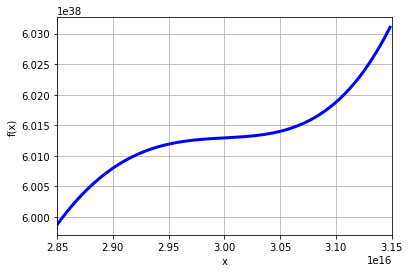

mphi_FI(phi0) = 1582.78029703925502814775641664
lambda6_FI(phi0) = 0.00000000887698637391375150456994150317


In [130]:
import mpmath as mp
from mpmath import *
import numpy as np

mp.dps = 500
mp.prec = 166

lnMpinGev = mp.mpf('42.334')
Mp = mp.exp(lnMpinGev)
phigut = mp.mpf('3e16')


def env(phi0, A6gut, g1gut, g2gut, g3gut, m1gut, m2gut, m3gut, epsilon):
    pre = mp.mpf('1')/(mp.mpf('8')*mp.pi**2)
    b1, b2, b3 = mp.mpf('33')/mp.mpf('5'), mp.mpf('1'), mp.mpf('-3')
    # b1, b2, b3 = 0, 0, 0

    g1 = lambda phi : g1gut/(mp.sqrt(1-pre*b1*g1gut**2*mp.log(phi/phigut)))
    g2 = lambda phi : g2gut/(mp.sqrt(1-pre*b2*g2gut**2*mp.log(phi/phigut)))
    g3 = lambda phi : g3gut/(mp.sqrt(1-pre*b3*g3gut**2*mp.log(phi/phigut)))

    M1 = lambda phi : m1gut*(g1(phi)/g1gut)**mp.mpf('2')
    M2 = lambda phi : m2gut*(g2(phi)/g2gut)**mp.mpf('2')
    M3 = lambda phi : m3gut*(g3(phi)/g3gut)**mp.mpf('2')

    mphi = lambda phi, mphigut : mp.sqrt(mphigut**2+(m2gut**2-M2(phi)**2)+mp.mpf('1')/11*(m1gut**2-M1(phi)**2))
    A6 = lambda phi, A6gut : A6gut-mp.mpf('6')*(m2gut-M2(phi))-mp.mpf('6')/11*(m1gut-M1(phi))
    lambda6 = lambda phi, lambda6gut : lambda6gut*(g2gut/g2(phi))**mp.mpf('6')*(g1gut/g1(phi))**(mp.mpf('6')/11)

    mphi_run = lambda phi_start, phi_end, mphi_start : mp.sqrt(mphi_start**2+(M2(phi_start)**2-M2(phi_end)**2)+mp.mpf('1')/11*(M1(phi_start)**2-M1(phi_end)**2))
    lambda6_run = lambda phi_start, phi_end, lambda6_start : lambda6_start*(g2(phi_start)/g2(phi_end))**mp.mpf('6')*(g1(phi_start)/g1(phi_end))**(mp.mpf('6')/11)

    B1=b1/(16*mp.pi**2)
    B2=b2/(16*mp.pi**2)
    C1=2*B1
    C2=2*B2
    e1=3/(20*mp.pi**2)
    e2=1/(4*mp.pi**2)
    F1=3*e1
    F2=3*e2
    D1=F1/2
    D2=F2/2
    def betag1(phi):
    #     return mp.mpf('0')
        return 2*B1*g1(phi)**4
    def betag2(phi):
        return 2*B2*g2(phi)**4
    def betaM1(phi):
        return C1*g1(phi)**2*M1(phi)
    def betaM2(phi):
        return C2*g2(phi)**2*M2(phi)
    def betam(phi):
        return -e1*g1(phi)**2*M1(phi)**2-e2*g2(phi)**2*M2(phi)**2
    def betaA(phi):
        return F1*g1(phi)**2*M1(phi)+F2*g2(phi)**2*M2(phi)
    def betalambda(phi):
        return -(D1*g1(phi)**2+D2*g2(phi)**2)
    def CST1p(phi):
        return 2*epsilon/phi-betam(phi)
    def CST2p(phi):
        return -2*((B1+C1)*e1*M1(phi)**2*g1(phi)**4+(B2+C2)*e2*M2(phi)**2*g2(phi)**4)+3*betam(phi)
    def c1(phi):
        return -12*(5+betalambda(phi))
    def c2(phi):
        return -12*(D1*betag1(phi)+D2*betag2(phi)-(5+betalambda(phi))*(9+2*betalambda(phi)))
    def c3(phi):
        return betaA(phi)+A6(phi, A6gut)*(6+betalambda(phi))
    def c4(phi):
        return -(2*B1+C1)*F1*M1(phi)*g1(phi)**4-(2*B2+C2)*F2*M2(phi)*g2(phi)**4-betaA(phi)*(mp.mpf('11')+2*betalambda(phi))+A6(phi, A6gut)*(D1*betag1(phi)+D2*betag2(phi)-(5+betalambda(phi))*(6+betalambda(phi)))
    def COEF1(phi):
        return 3*(CST2p(phi)*c1(phi) - CST1p(phi)*c2(phi))**2 + (CST2p(phi)*c3(phi) - CST1p(phi)*c4(phi))*(c2(phi)*c3(phi) - c1(phi)*c4(phi))
    def COEF2(phi):
        return 2*(6*(c1(phi) + c2(phi))*(CST2p(phi)*c1(phi) - CST1p(phi)*c2(phi)) + (c3(phi) + c4(phi))*(c2(phi)*c3(phi) - c1(phi)*c4(phi)))
    def COEF3(phi):
        return 12*(c1(phi) + c2(phi))**2
    def mphi_FI(phi):
        Gilbert_res = mp.sqrt((-COEF2(phi) + mp.sqrt(COEF2(phi)**2-4*COEF1(phi)*COEF3(phi)))/(80*COEF3(phi)))
    #     return Gilbert_res
        Maybe_typo = Gilbert_res*mp.sqrt('40')
        return Maybe_typo
    def lambda6_FI(phi):
        return 3*Mp**3/phi**4*(CST2p(phi)*c1(phi) - CST1p(phi)*c2(phi) + 2*mphi_FI(phi)**2*(c1(phi) + c2(phi)))/(c2(phi)*c3(phi) - c1(phi)*c4(phi))

    def phi0B(lambda6_in):
        return mp.findroot(lambda lambda6_FI(phi0)-lambda6_in)
        
    def V(phi, phi0, A6gut):
        mphi_FI_phi0, lambda6_FI_phi0 = mphi_FI(phi0), lambda6_FI(phi0)
        mphi_FI_gut, lambda6_FI_gut = mphi_run(phi0, phigut, mphi_FI_phi0), lambda6_run(phi0, phigut, lambda6_FI_phi0)
        return 1/2*mphi(phi, mphi_FI_gut)**2*phi**2-A6(phi, A6gut)*lambda6(phi, lambda6_FI_gut)*phi**6/(6*Mp**3)+lambda6(phi, lambda6_FI_gut)**2/Mp**6*phi**10

    print('phi0 =',nstr(phi0, 10),'\n')
    print('result:')
    print('mphi_FI(phi0) =',nstr(mphi_FI(phi0),30))
    print('lambda6_FI(phi0) =',nstr(lambda6_FI(phi0),30))
    print('V\'(phi0) =',nstr(DV(lambda phi : V(phi, phi0, A6gut), phi0),20))
    print('V\'\'(phi0) =',nstr(D2V(lambda phi : V(phi, phi0, A6gut), phi0),20))
    mp.plot(lambda phi : V(phi, phi0, A6gut), xlim=(phi0*0.95, phi0*1.05), points=200)

    return mphi_FI(phi0), lambda6_FI(phi0)


A6gut = mp.mpf('10000')
g1gut = mp.sqrt(mp.mpf('5')/mp.mpf('3'))*mp.mpf('5.45185741e-01')
g2gut = mp.mpf('6.90473022e-01')
g3gut = mp.mpf('6.84972506e-01')
m1gut = mp.mpf('1.36108022e+02')
m2gut = mp.mpf('1.14286222e+03')
m3gut = mp.mpf('8.98639714e+02')
phi0 = mp.mpf('3e16')
epsilon = 1e20
mphi_FI, lambda6_FI = env(phi0, A6gut, g1gut, g2gut, g3gut, m1gut, m2gut, m3gut, epsilon)
print('mphi_FI(phi0) =',nstr(mphi_FI,30))
print('lambda6_FI(phi0) =',nstr(lambda6_FI,30))


In [151]:
import mpmath as mp
from mpmath import *
import numpy as np

mp.dps = 500
mp.prec = 166

lnMpinGev = mp.mpf('42.334')
Mp = mp.exp(lnMpinGev)
phigut = mp.mpf('3e16')


def alaboehm(phi0, lambda6_in, A6gut, g1gut, g2gut, g3gut, m1gut, m2gut, m3gut, epsilon):
    pre = mp.mpf('1')/(mp.mpf('8')*mp.pi**2)
    b1, b2, b3 = mp.mpf('33')/mp.mpf('5'), mp.mpf('1'), mp.mpf('-3')
    # b1, b2, b3 = 0, 0, 0

    g1 = lambda phi : g1gut/(mp.sqrt(1-pre*b1*g1gut**2*mp.log(phi/phigut)))
    g2 = lambda phi : g2gut/(mp.sqrt(1-pre*b2*g2gut**2*mp.log(phi/phigut)))
    g3 = lambda phi : g3gut/(mp.sqrt(1-pre*b3*g3gut**2*mp.log(phi/phigut)))

    M1 = lambda phi : m1gut*(g1(phi)/g1gut)**mp.mpf('2')
    M2 = lambda phi : m2gut*(g2(phi)/g2gut)**mp.mpf('2')
    M3 = lambda phi : m3gut*(g3(phi)/g3gut)**mp.mpf('2')

    mphi = lambda phi, mphigut : mp.sqrt(mphigut**2+(m2gut**2-M2(phi)**2)+mp.mpf('1')/11*(m1gut**2-M1(phi)**2))
    A6 = lambda phi, A6gut : A6gut-mp.mpf('6')*(m2gut-M2(phi))-mp.mpf('6')/11*(m1gut-M1(phi))
    lambda6 = lambda phi, lambda6gut : lambda6gut*(g2gut/g2(phi))**mp.mpf('6')*(g1gut/g1(phi))**(mp.mpf('6')/11)

    mphi_run = lambda phi_start, phi_end, mphi_start : mp.sqrt(mphi_start**2+(M2(phi_start)**2-M2(phi_end)**2)+mp.mpf('1')/11*(M1(phi_start)**2-M1(phi_end)**2))
    lambda6_run = lambda phi_start, phi_end, lambda6_start : lambda6_start*(g2(phi_start)/g2(phi_end))**mp.mpf('6')*(g1(phi_start)/g1(phi_end))**(mp.mpf('6')/11)

    B1=b1/(16*mp.pi**2)
    B2=b2/(16*mp.pi**2)
    C1=2*B1
    C2=2*B2
    e1=3/(20*mp.pi**2)
    e2=1/(4*mp.pi**2)
    F1=3*e1
    F2=3*e2
    D1=F1/2
    D2=F2/2
    def betag1(phi):
    #     return mp.mpf('0')
        return 2*B1*g1(phi)**4
    def betag2(phi):
        return 2*B2*g2(phi)**4
    def betaM1(phi):
        return C1*g1(phi)**2*M1(phi)
    def betaM2(phi):
        return C2*g2(phi)**2*M2(phi)
    def betam(phi):
        return -e1*g1(phi)**2*M1(phi)**2-e2*g2(phi)**2*M2(phi)**2
    def betaA(phi):
        return F1*g1(phi)**2*M1(phi)+F2*g2(phi)**2*M2(phi)
    def betalambda(phi):
        return -(D1*g1(phi)**2+D2*g2(phi)**2)
    def CST1p(phi):
        return 2*epsilon/phi-betam(phi)
    def CST2p(phi):
        return -2*((B1+C1)*e1*M1(phi)**2*g1(phi)**4+(B2+C2)*e2*M2(phi)**2*g2(phi)**4)+3*betam(phi)
    def c1(phi):
        return -12*(5+betalambda(phi))
    def c2(phi):
        return -12*(D1*betag1(phi)+D2*betag2(phi)-(5+betalambda(phi))*(9+2*betalambda(phi)))
    def c3(phi):
        return betaA(phi)+A6(phi, A6gut)*(6+betalambda(phi))
    def c4(phi):
        return -(2*B1+C1)*F1*M1(phi)*g1(phi)**4-(2*B2+C2)*F2*M2(phi)*g2(phi)**4-betaA(phi)*(mp.mpf('11')+2*betalambda(phi))+A6(phi, A6gut)*(D1*betag1(phi)+D2*betag2(phi)-(5+betalambda(phi))*(6+betalambda(phi)))
    def COEF1(phi):
        return 3*(CST2p(phi)*c1(phi) - CST1p(phi)*c2(phi))**2 + (CST2p(phi)*c3(phi) - CST1p(phi)*c4(phi))*(c2(phi)*c3(phi) - c1(phi)*c4(phi))
    def COEF2(phi):
        return 2*(6*(c1(phi) + c2(phi))*(CST2p(phi)*c1(phi) - CST1p(phi)*c2(phi)) + (c3(phi) + c4(phi))*(c2(phi)*c3(phi) - c1(phi)*c4(phi)))
    def COEF3(phi):
        return 12*(c1(phi) + c2(phi))**2
    def mphi_FI(phi):
        Gilbert_res = mp.sqrt((-COEF2(phi) + mp.sqrt(COEF2(phi)**2-4*COEF1(phi)*COEF3(phi)))/(80*COEF3(phi)))
    #     return Gilbert_res
        Maybe_typo = Gilbert_res*mp.sqrt('40')
        return Maybe_typo
    def lambda6_FI(phi):
        return 3*Mp**3/phi**4*(CST2p(phi)*c1(phi) - CST1p(phi)*c2(phi) + 2*mphi_FI(phi)**2*(c1(phi) + c2(phi)))/(c2(phi)*c3(phi) - c1(phi)*c4(phi))

#     def phi0B():
#         return mp.findroot(lambda phi0 : lambda6_FI(phi0)-lambda6_in)
#     def phi0_from_all(mphi_in, phi):
#         return mp.findroot(lambda phi : mphi_FI(phi)-mphi_in)
#     def lambda6_from_all(mphi_in, phi):
#         return lambda6_FI(phi0_from_all(mphi_in, phi))
    
    def phi0B(mphi, lambda6_ini):
#         mp.plot(lambda phi : mphi_FI(phi), xlim = ((Mp**3*A6gut/(20*lambda6_ini))**mp.mpf('0.25')*0.5, (Mp**3*A6gut/(20*lambda6_ini))**mp.mpf('0.25')*1.2), points=20)
        return mp.findroot(lambda phi : mphi_FI(phi)-mphi, x0 = (Mp**3*A6gut/(20*lambda6_ini))**mp.mpf('0.25'), verbose=True)
    def mphi2(lambda6_ini):
        return mp.findroot(lambda mphi : lambda6_FI(phi0B(mphi, lambda6_ini))-lambda6_ini, x0 = A6gut/mp.sqrt('40'), verbose=True)
    print(mphi2(lambda6_in))
#     phi0B_res = phi0B(lambda6_in)
#     alpha_eff_res = alpha_eff(phi0B_res)
#     print('phi0B_res =', phi0B_res)
#     print('alpha_eff =', alpha_eff_res)

A6gut = mp.mpf('10000')
g1gut = mp.sqrt(mp.mpf('5')/mp.mpf('3'))*mp.mpf('5.45185741e-01')
g2gut = mp.mpf('6.90473022e-01')
g3gut = mp.mpf('6.84972506e-01')
m1gut = mp.mpf('1.36108022e+02')
m2gut = mp.mpf('1.14286222e+03')
m3gut = mp.mpf('8.98639714e+02')
phi0 = mp.mpf('3e16')
lambda6_in = mp.mpf('1')

epsilon = 0
alaboehm(lambda6_in, lambda6_in, A6gut, g1gut, g2gut, g3gut, m1gut, m2gut, m3gut, epsilon)
print('mphi_FI(phi0) =',nstr(mphi_FI,30))
print('lambda6_FI(phi0) =',nstr(lambda6_FI,30))



x:     1661944919216974.76861046817979802417612623358010265588414984
error: 0.25
x:     3950912485605664.633641278358907297820237975080791837032116773
error: 1371000890155456.603064304749909882261635437798162175555297958
x:     9202815067232780.915878688781430942152789698414287919429203328
error: 2288967566388689.865030810179109273644111741500689181147966933
x:     16128642914203219.138509149785764537574613201961205230047275
error: 5251902581627116.282237410422523644332551723333496082397086555
x:     22813664741512756.25156538785960583224478024907857627570189014
error: 6925827846970438.222630461004333595421823503546917310618071671
x:     26492884113853350.57271730231529265682124414748151677796028245
error: 6685021827309537.113056238073841294670167047117371045654615146
x:     27490855899809557.29521230897041216534440229224323318856998164
error: 3679219372340594.321151914455686824576463898402940502258392306
x:     27585750255466554.59031592965665289340351749534238464781803054
error: 9979

ValueError: Could not find root within given tolerance. (22987716833324609.5883734586760956448198908096985841539525061 > 1.991364888915565346286100497209639756988880693990773482592357e-59)
Try another starting point or tweak arguments.